In [84]:
library("seqinr")
library("zoo")
library("ggplot2")
library('reshape')
library('dplyr')
library('stringr')
library('Biostrings')
library("msa")
library("ape")
library("DECIPHER")

In [29]:
url <- "ftp://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/viruses.txt"
filename <- basename(url)
#download.file(url = url, destfile = filename)
#system("open .")
d <- read.delim(file = filename, stringsAsFactors=FALSE, na.strings="-", check.names=FALSE)
str(d)

'data.frame':	34629 obs. of  15 variables:
 $ #Organism/Name      : chr  "Mushroom bacilliform virus" "White spot syndrome virus" "Hepatitis E virus" "Posavirus sp." ...
 $ TaxID               : int  32625 342409 12461 1930510 46014 10661 239720 129395 261939 67571 ...
 $ BioProject Accession: chr  "" "" "" "" ...
 $ BioProject ID       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Group               : chr  "Other" "Other" "Other" "unclassified viruses" ...
 $ SubGroup            : chr  "Barnaviridae" "Nimaviridae" "Hepeviridae" "unclassified" ...
 $ Size (Kb)           : num  4.01 309.29 7.18 9.57 11.96 ...
 $ GC%                 : num  46.3 40.9 57.9 32.8 32 42.2 46.9 53.4 38.7 43.9 ...
 $ Host                : chr  "fungi" "invertebrates,vertebrates" "human,invertebrates,land plants,vertebrates" "vertebrates" ...
 $ Segmemts            : chr  " Unknown:NC_001633.1/U07551.1" " Unknown:NC_003225.3/KT995472.1" " Unknown:NC_001434.1/L08816.1" "NC_032412.1/KX673273.1" ...
 $ Genes               : i

In [30]:
colnames(d)

[1] "#Organism/Name"       "TaxID"                "BioProject Accession"
 [4] "BioProject ID"        "Group"                "SubGroup"            
 [7] "Size (Kb)"            "GC%"                  "Host"                
[10] "Segmemts"             "Genes"                "Proteins"            
[13] "Release Date"         "Modify Date"          "Status"

In [31]:
organism_name <- "coronavirus"
TF <- grepl(pattern = organism_name, x = d$`#Organism/Name`, ignore.case=FALSE); summary(TF); d$`#Organism/Name`[TF]

   Mode   FALSE    TRUE 
logical   34579      50 

[1] "Bat coronavirus BM48-31/BGR/2008"                     
 [2] "Human coronavirus 229E"                               
 [3] "Human coronavirus NL63"                               
 [4] "Human coronavirus HKU1"                               
 [5] "Bat coronavirus HKU4-1"                               
 [6] "Bat coronavirus HKU5-1"                               
 [7] "Bat coronavirus HKU9-1"                               
 [8] "Scotophilus bat coronavirus 512"                      
 [9] "Rhinolophus bat coronavirus HKU2"                     
[10] "Miniopterus bat coronavirus HKU8"                     
[11] "Beluga whale coronavirus SW1"                         
[12] "Human coronavirus OC43"                               
[13] "Severe acute respiratory syndrome-related coronavirus"
[14] "Sparrow coronavirus HKU17"                            
[15] "Porcine coronavirus HKU15"                            
[16] "White-eye coronavirus HKU16"                          
[17] "Magpie-robin coronavirus HKU18"                       
[18] "Night heron coronavirus HKU19"                        
[19] "Wigeon coronavirus HKU20"                             
[20] "Common moorhen coronavirus HKU21"                     
[21] "Rabbit coronavirus HKU14"                             
[22] "Rousettus bat coronavirus HKU10"                      
[23] "Human betacoronavirus 2c EMC/2012"                    
[24] "Bat coronavirus CDPHE15/USA/2006"                     
[25] "Betacoronavirus Erinaceus/VMC/DEU/2012"               
[26] "Thrush coronavirus HKU12-600"                         
[27] "Munia coronavirus HKU13-3514"                         
[28] "Betacoronavirus England 1"                            
[29] "Bat Hp-betacoronavirus/Zhejiang2013"                  
[30] "Betacoronavirus HKU24"                                
[31] "Camel alphacoronavirus"                               
[32] "Swine enteric coronavirus"                            
[33] "Ferret coronavirus"                                   
[34] "Rousettus bat coronavirus"                            
[35] "Mink coronavirus strain WD1127"                       
[36] "NL63-related bat coronavirus"                         
[37] "Lucheng Rn rat coronavirus"                           
[38] "Bat coronavirus"                                      
[39] "Wencheng Sm shrew coronavirus"                        
[40] "Bulbul coronavirus HKU11-934"                         
[41] "unidentified human coronavirus"                       
[42] "Miniopterus bat coronavirus 1"                        
[43] "NL63-related bat coronavirus"                         
[44] "Ferret coronavirus"                                   
[45] "Swine enteric coronavirus"                            
[46] "Betacoronavirus Erinaceus/VMC/DEU/2012"               
[47] "Porcine coronavirus HKU15"                            
[48] "Bovine coronavirus"                                   
[49] "Turkey coronavirus"                                   
[50] "Rat coronavirus Parker"

In [32]:
organism_name <- "Severe acute respiratory syndrome|Human betacoronavirus|^[^ ]+ coronavirus$"
TF <- grepl(pattern = organism_name, x = d$`#Organism/Name`, ignore.case=FALSE); summary(TF); d$`#Organism/Name`[TF]

   Mode   FALSE    TRUE 
logical   34622       7 

[1] "Severe acute respiratory syndrome-related coronavirus"
[2] "Human betacoronavirus 2c EMC/2012"                    
[3] "Ferret coronavirus"                                   
[4] "Bat coronavirus"                                      
[5] "Ferret coronavirus"                                   
[6] "Bovine coronavirus"                                   
[7] "Turkey coronavirus"

In [33]:
d <- d[TF,]
summary(d[c(7,8,11,12)])

   Size (Kb)          GC%            Genes          Proteins    
 Min.   :27.66   Min.   :37.10   Min.   : 8.00   Min.   : 9.00  
 1st Qu.:28.49   1st Qu.:38.55   1st Qu.:10.00   1st Qu.: 9.50  
 Median :29.64   Median :39.00   Median :10.00   Median :11.00  
 Mean   :29.31   Mean   :39.49   Mean   :10.33   Mean   :10.86  
 3rd Qu.:29.93   3rd Qu.:41.00   3rd Qu.:10.75   3rd Qu.:11.50  
 Max.   :31.03   Max.   :41.20   Max.   :13.00   Max.   :14.00  
                                 NA's   :1                      

In [34]:
d$Refseq <- sub(pattern="( Unknown:)*((.+)\\.[0-9]\\/)*(.+)\\.[0-9]", replacement="\\3", d$`Segmemts`)
d$INSDC <- sub(pattern="( Unknown:)*((.+)\\.[0-9]\\/)*(.+)\\.[0-9]", replacement="\\4", d$`Segmemts`)

In [35]:
retrieve_ncbi_fna <- function(ACCESSION) read.fasta(file = paste0("https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=",ACCESSION,"&rettype=fasta&retmode=text"), seqtype="DNA", strip.desc=TRUE)[[1]]
INSDC.seqs <- lapply(d$INSDC, retrieve_ncbi_fna)

In [36]:
ACCESSION <- "NC_045512"
filename <- paste0("http://togows.org/entry/nucleotide/",ACCESSION,".fasta")
novel_coronavirus.seqs <- read.fasta(file=filename, seqtype="DNA", strip.desc=TRUE)

In [37]:
seqs <- c(novel_coronavirus.seqs, INSDC.seqs)
length(seqs)

[1] 8

In [48]:
write.fasta(sequences=seqs, names=getAnnot(seqs), file.out="mySequences.fna")

In [49]:
filename <- "mySequences.fna"
seqs <- read.fasta(file=filename, seqtype="DNA", strip.desc=TRUE)

In [50]:
unlist(getAnnot(seqs))

[1] "NC_045512.2 Wuhan seafood market pneumonia virus isolate Wuhan-Hu-1, complete genome"          
[2] "AY274119.3 Severe acute respiratory syndrome-related coronavirus isolate Tor2, complete genome"
[3] "JX869059.2 Human betacoronavirus 2c EMC/2012, complete genome"                                 
[4] "LC119077.1 Ferret coronavirus genomic RNA, complete genome, strain: FRCoV4370"                 
[5] "KX574227.1 Bat coronavirus isolate PREDICT/PDF-2180, complete genome"                          
[6] "KM347965.1 Ferret coronavirus isolate FRCoV-NL-2010, complete genome"                          
[7] "AF391541.1 Bovine coronavirus isolate BCoV-ENT, complete genome"                               
[8] "EU095850.1 Turkey coronavirus isolate MG10, complete genome"

In [91]:
novel_corona_virus <- seqs[[1]]
SARS_corona <- seqs[[2]]
betacorona <- seqs[[3]]
ferret_corona <- seqs[[4]]
bat_corona <- seqs[[5]]
ferret_corona_2 <- seqs[[6]]
bovine_corona <- seqs[[7]]
turkey_corona <- seqs[[8]]

In [99]:
novelstring <- toupper(c2s(novel_corona_virus))
SARSstring <- toupper(c2s(SARS_corona))
MERSstring <- toupper(c2s(betacorona))
ferretstring <- toupper(c2s(ferret_corona))
batstring <- toupper(c2s(bat_corona))
ferretstring1 <- toupper(c2s(ferret_corona_2))
bovinestring <- toupper(c2s(bovine_corona))
turkeystring <- toupper(c2s(turkey_corona))

In [51]:
sapply(seqs, summary)

NC_045512.2            AY274119.3            
length      29903                  29751                 
composition 8954, 5492, 5863, 9594 8481, 5940, 6187, 9143
GC          0.3797278              0.4076166             
            JX869059.2             LC119077.1            
length      30119                  28550                 
composition 7900, 6116, 6304, 9799 7927, 4834, 6250, 9536
GC          0.4123643              0.388272              
            KX574227.1             KM347965.1            
length      29642                  28434                 
composition 7679, 5898, 6304, 9761 7913, 4883, 6208, 9430
GC          0.4116456              0.3900612             
            AF391541.1              EU095850.1            
length      31028                   27657                 
composition 8487, 4752, 6767, 11022 7969, 4513, 6066, 9108
GC          0.3712453               0.382521

In [56]:
seqs

[1] "a" "t" "t" "a" "a" "a"

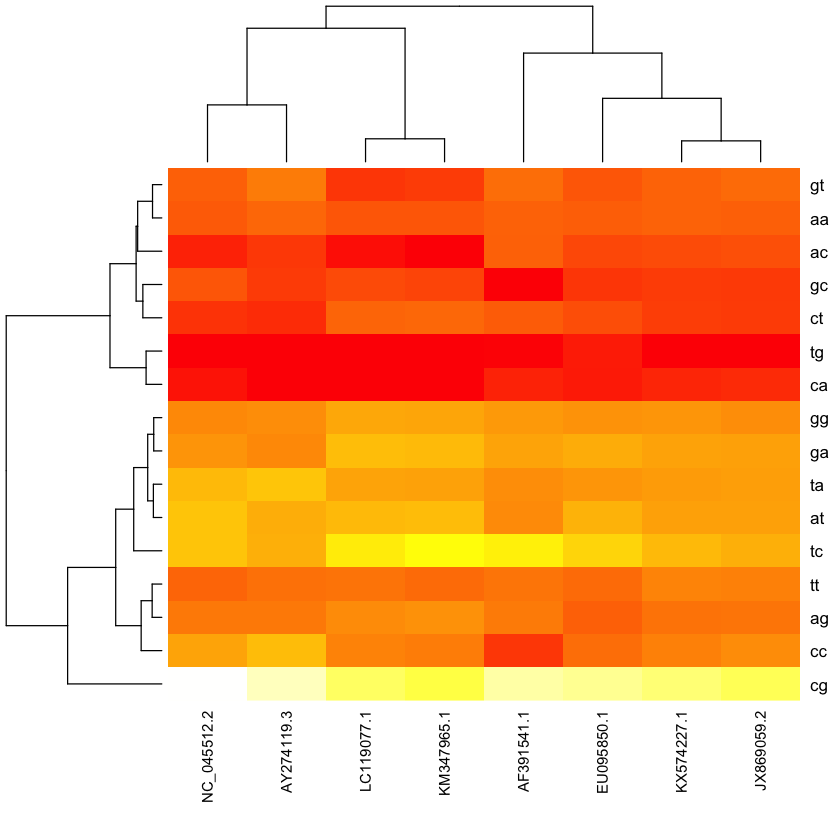

In [52]:
myrho <- sapply(seqs, rho, wordsize = 2)
heatmap(myrho,margins=c(7, 2), cexCol=0.9, scale="none", col=rev(heat.colors(999)))

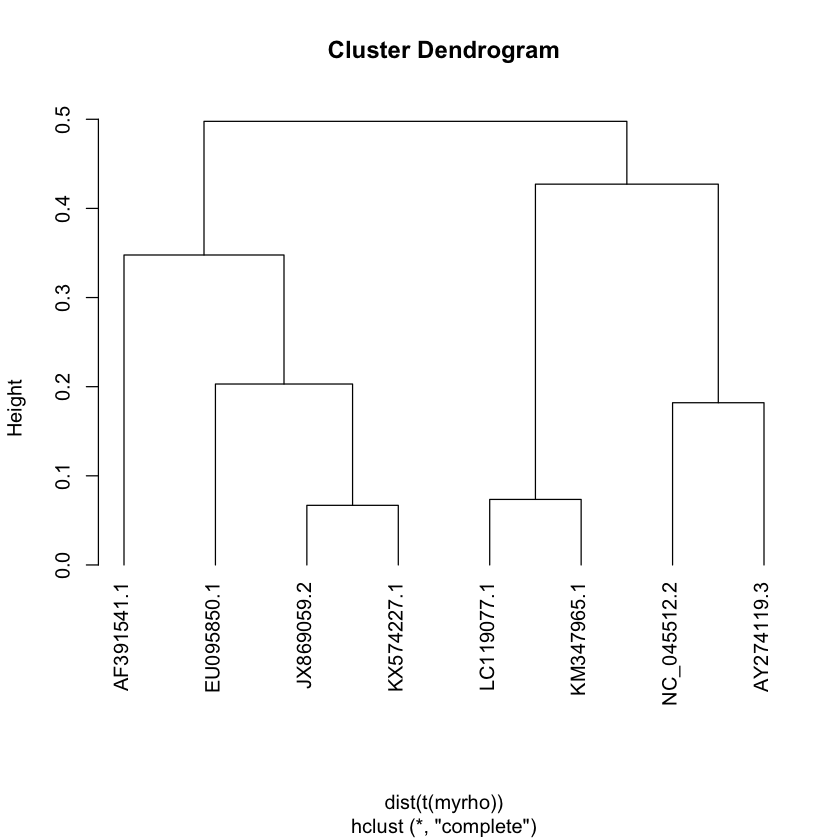

In [53]:
plot(hclust(dist(t(myrho))), hang=-1)

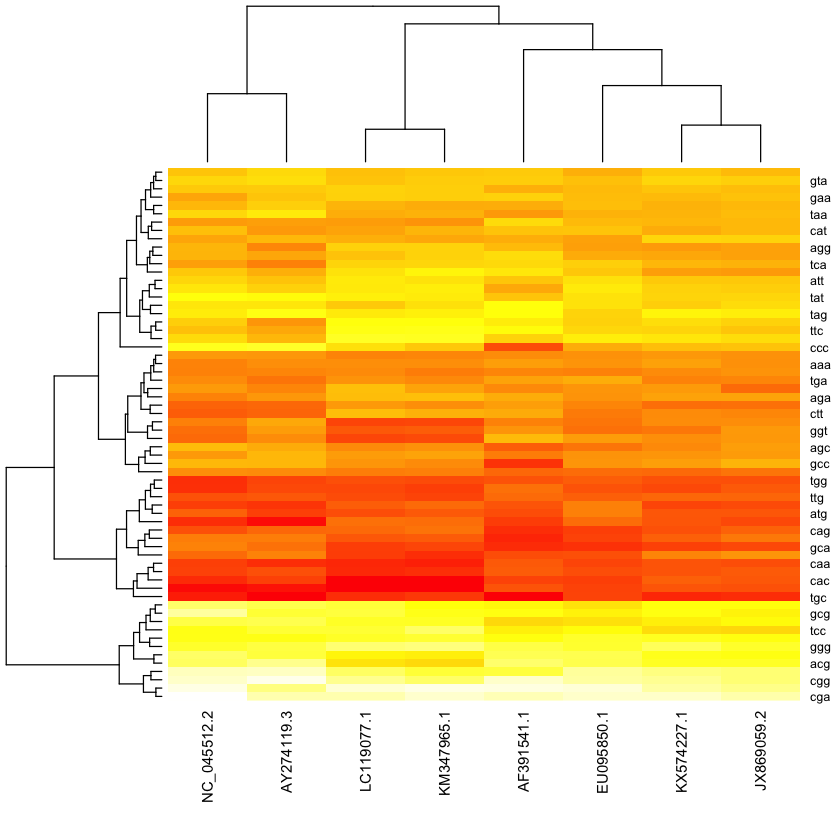

In [54]:
myrho1 <- sapply(seqs, rho, wordsize = 3)
heatmap(myrho1,margins=c(7, 2), cexCol=0.9, scale="none", col=rev(heat.colors(999)))

In [57]:
mySequences <- readDNAStringSet(file="mySequences.fna")
library(DECIPHER)
dbConn <- dbConnect(SQLite(), ":memory:")
Seqs2DB(seqs=mySequences, type="XStringSet", dbFile=dbConn, identifier=names(mySequences))

Adding 8 sequences to the database.

8 total sequences in table Seqs.
Time difference of 0.1 secs



In [58]:
BrowseDB(dbConn)
#dbDisconnect(dbConn)
synteny <- FindSynteny(dbFile=dbConn)


Time difference of 4.55 secs



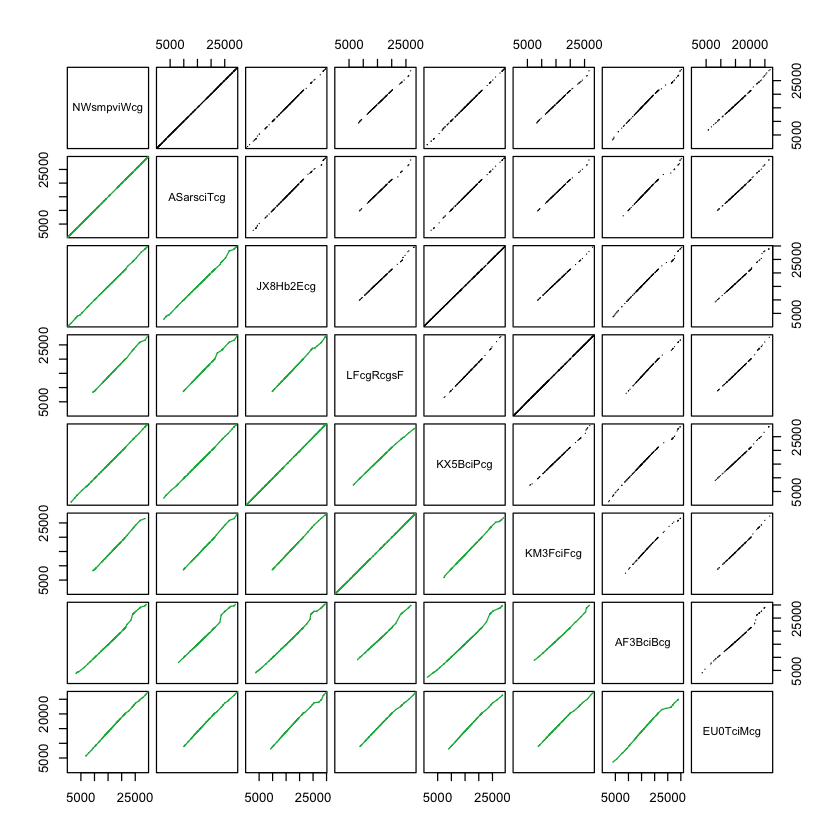

In [60]:
pairs(synteny) # scatterplot matrix

In [61]:
synteny

                                                                                               NC_045512.2 Wuhan seafood market pneumonia virus isolate Wuhan-Hu-1, complete genome
NC_045512.2 Wuhan seafood market pneumonia virus isolate Wuhan-Hu-1, complete genome                                                                                          1 seq
AY274119.3 Severe acute respiratory syndrome-related coronavirus isolate Tor2, complete genome                                                                              1 block
JX869059.2 Human betacoronavirus 2c EMC/2012, complete genome                                                                                                               1 block
LC119077.1 Ferret coronavirus genomic RNA, complete genome, strain: FRCoV4370                                                                                               1 block
KX574227.1 Bat coronavirus isolate PREDICT/PDF-2180, complete genome                                

In [72]:
slidingwindowplot <- function(windowsize, inputseq, main) 
{
    # Creating a vector of window sizes. 
    starts <- seq(1, length(inputseq)-windowsize, by=windowsize) 
    n <- length(starts)
    # Initialising a vector to store the values of GC content in those window sizes
    chunkGCs <- numeric(n)
    for(i in 1:n) 
    {
        chunk <- inputseq[starts[i]:(starts[i]+windowsize-1)]
        chunkGC <- GC(chunk)
        chunkGCs[i] <- chunkGC
    }
    plot(starts,chunkGCs,xlab="Nucleotide start position",ylab="GC content",type="b",main=main)
}

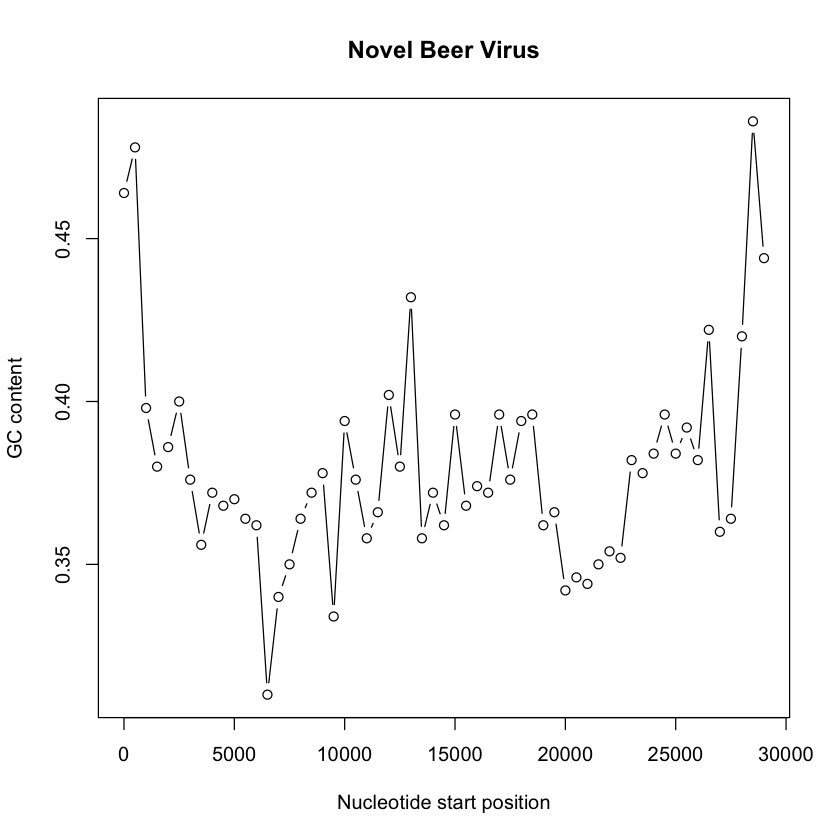

In [77]:
slidingwindowplot(500, novel_corona_virus, "Novel Beer Virus")

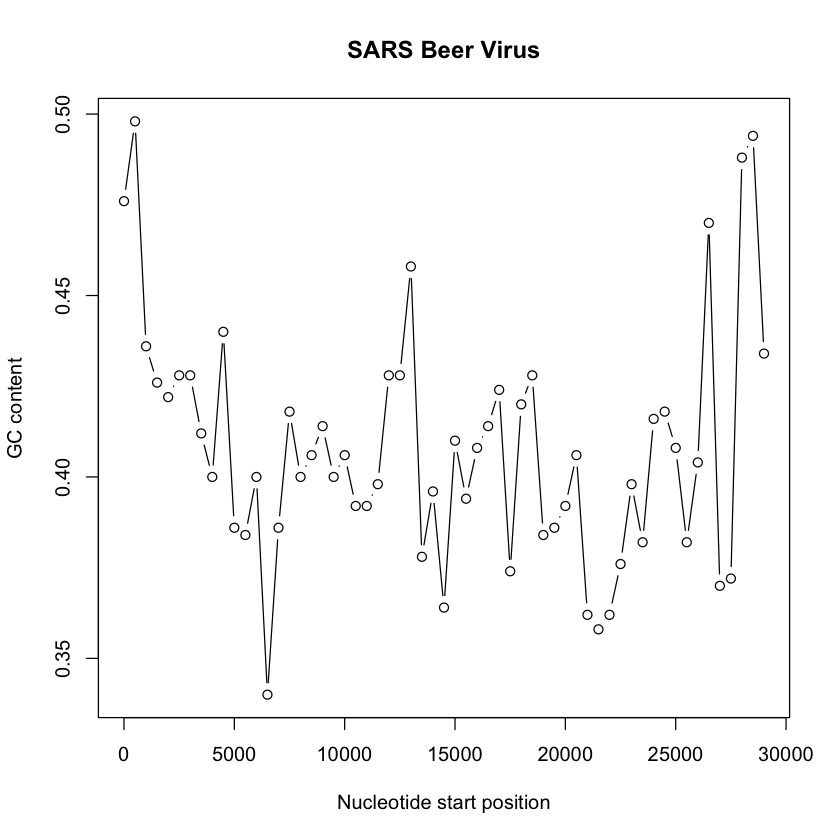

In [78]:
slidingwindowplot(500, SARS_corona, "SARS Beer Virus")

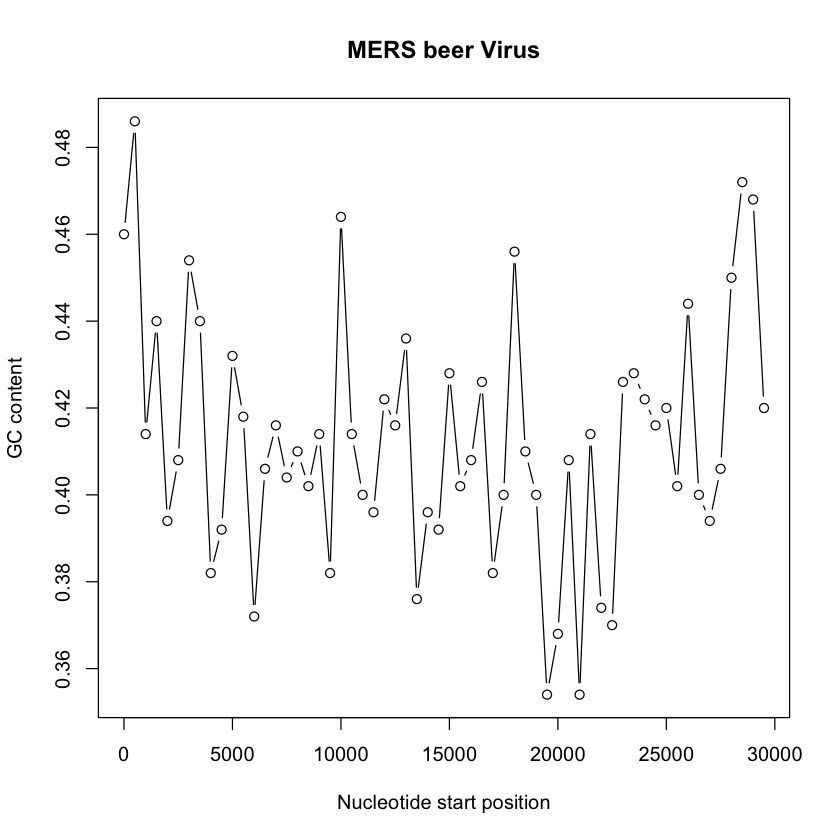

In [79]:
slidingwindowplot(500, betacorona, "MERS beer Virus")

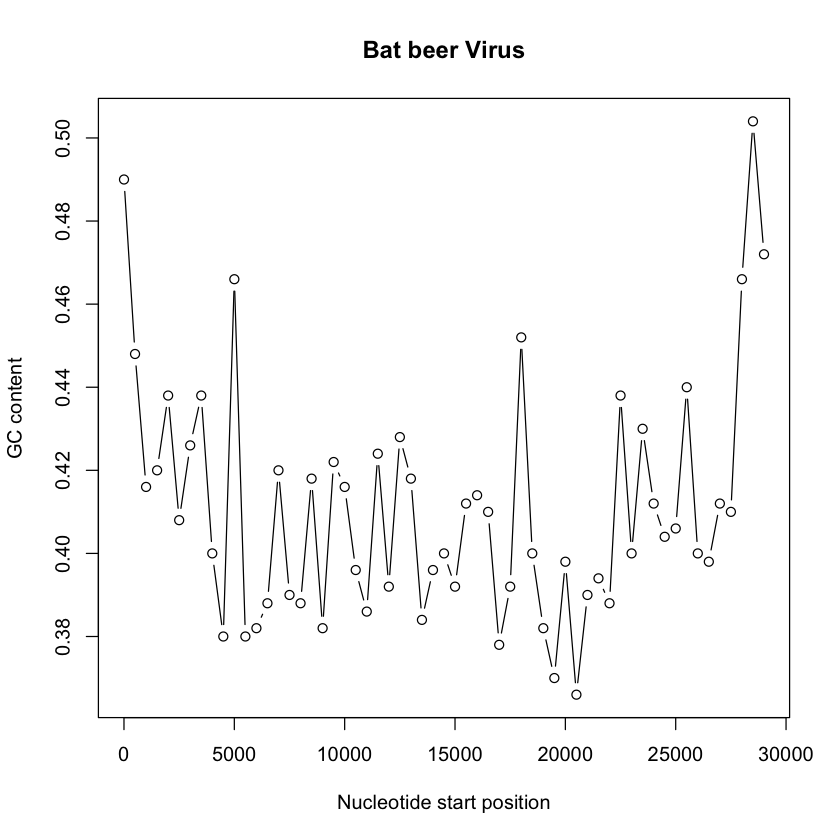

In [87]:
slidingwindowplot(500, bat_corona, "Bat beer Virus")

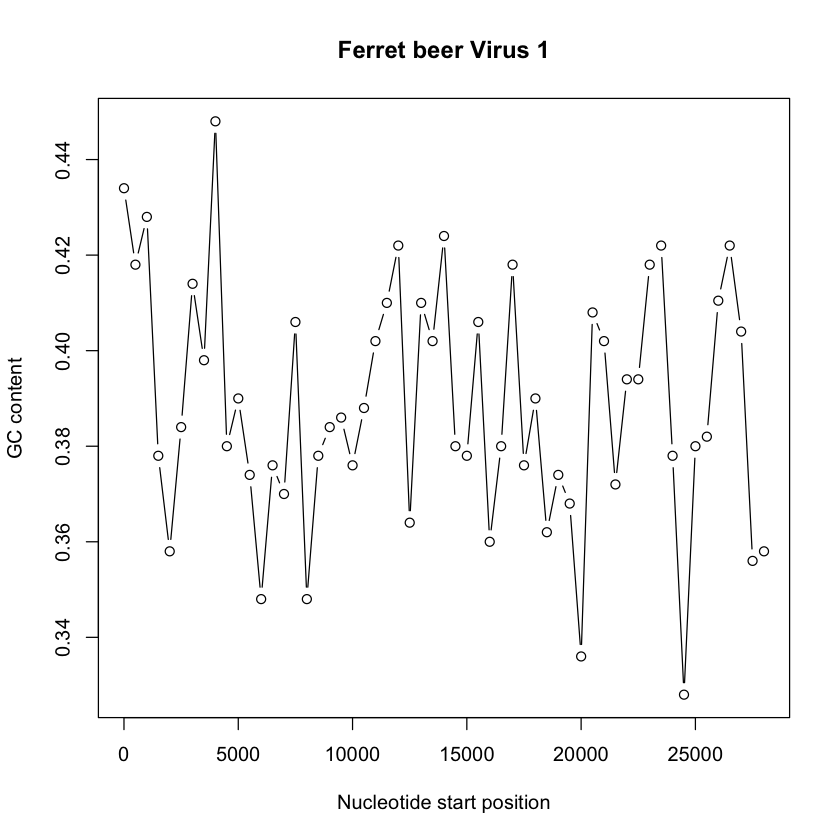

In [96]:
slidingwindowplot(500, ferret_corona, "Ferret beer Virus 1")

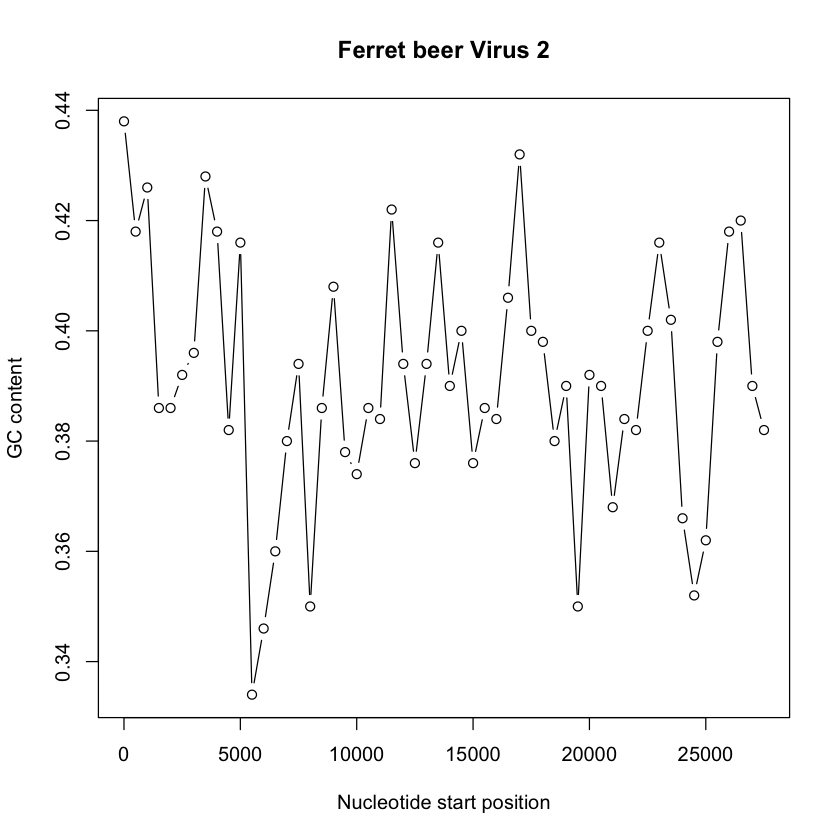

In [97]:
slidingwindowplot(500, ferret_corona_2, "Ferret beer Virus 2")

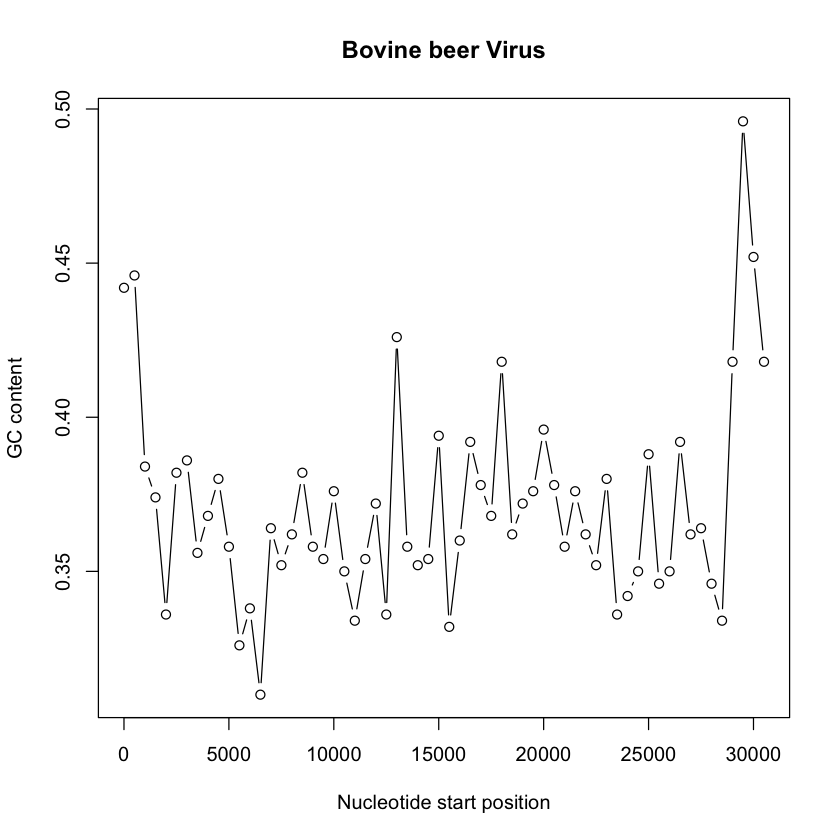

In [94]:
slidingwindowplot(500, bovine_corona, "Bovine beer Virus")

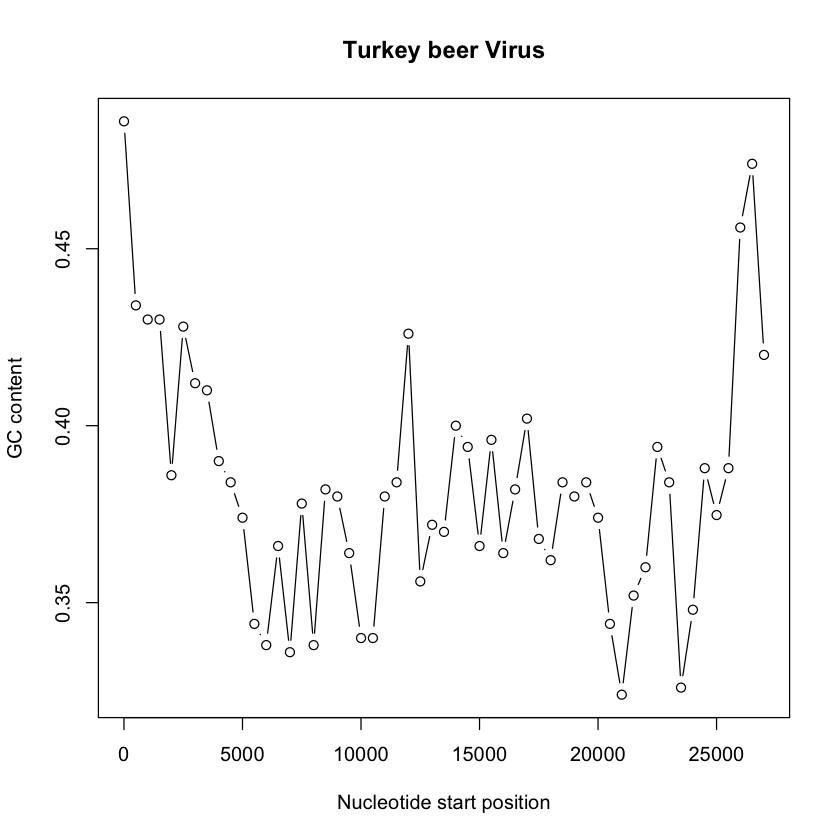

In [98]:
slidingwindowplot(500, turkey_corona, "Turkey beer Virus")

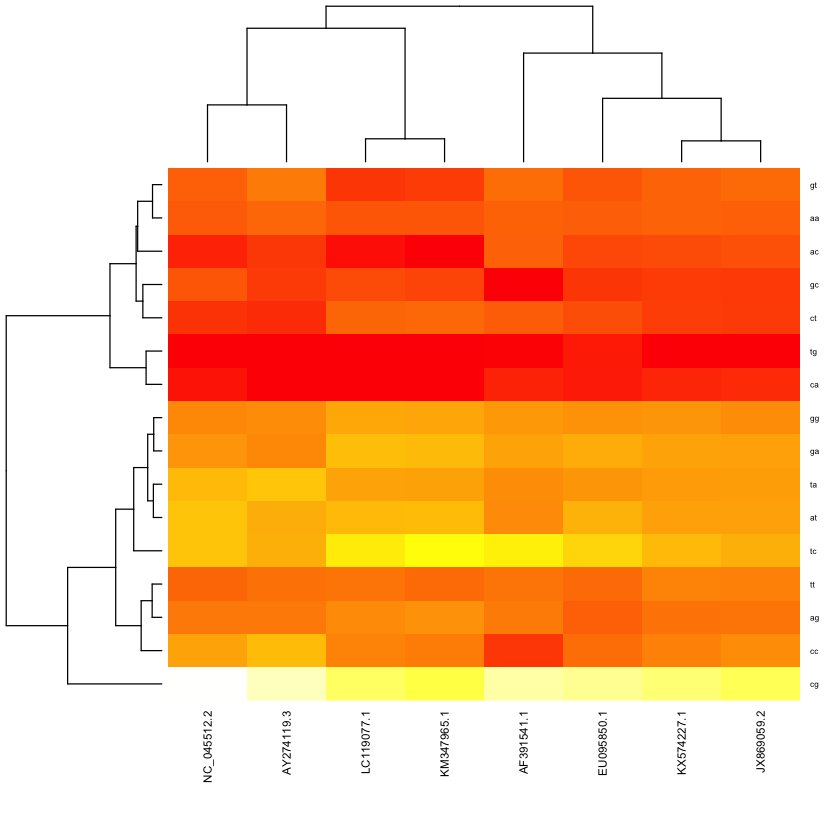

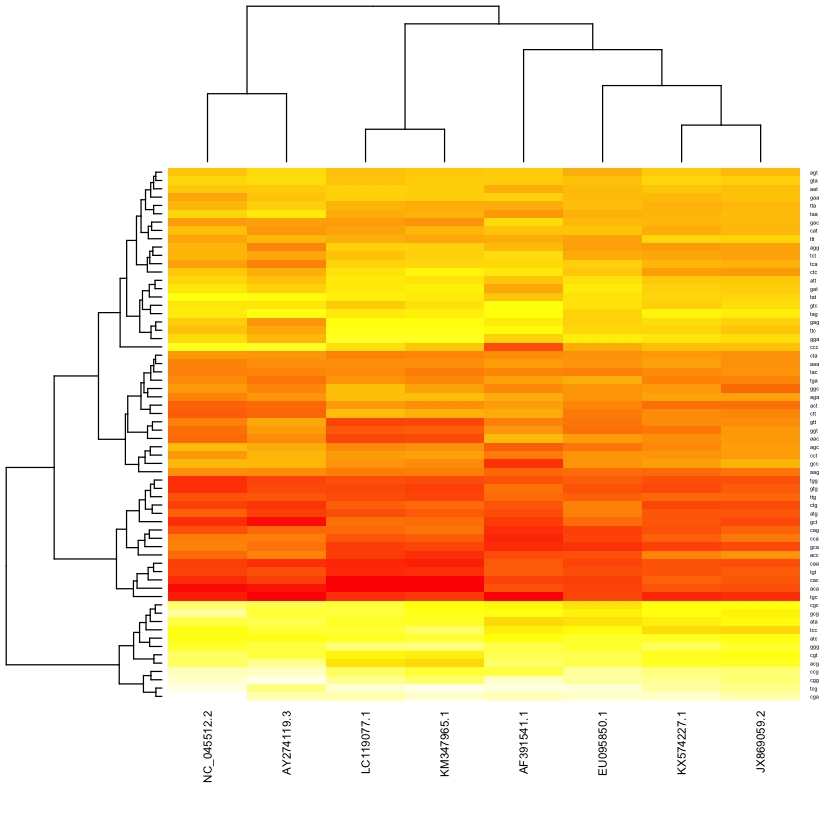

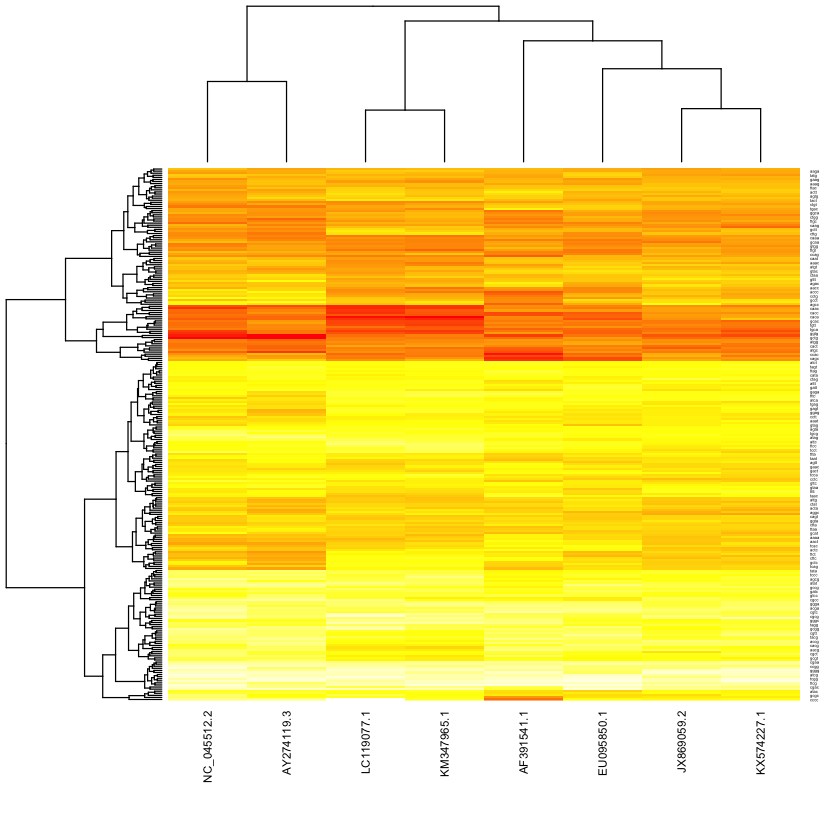

In [85]:
for(k in 2:4){
  myrho <- sapply(seqs, rho, wordsize = k)
  heatmap(myrho, margins=c(7, 2), cexRow=1/k, cexCol=0.7, scale="none", col=rev(heat.colors(999)))
}

In [100]:
data(BLOSUM62)
myglobalAlign_novel_sars <- pairwiseAlignment(novelstring, SARSstring, substitutionMatrix = "BLOSUM62",
                  gapOpening = -9.5, gapExtension = -0.5) 
myglobalAlign_novel_sars

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCA...CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
subject: ATATTAGGTTTTTACCTACCCAGGAAA--AGCCA...CAAAAAAAAAAAAAAAAAAAAAAAA---------
score: 129721 

In [101]:
myglobalAlign_novel_mers <- pairwiseAlignment(novelstring, MERSstring, substitutionMatrix = "BLOSUM62",
                  gapOpening = -9.5, gapExtension = -0.5) 
myglobalAlign_novel_mers

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCA...CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
subject: GATTTAAGTGAATAGCTT----GG---CTATCTC...CAAAAAAAAAAAA---------------------
score: 80429.5 

In [102]:
myglobalAlign_novel_novel <- pairwiseAlignment(novelstring, novelstring, substitutionMatrix = "BLOSUM62",
                  gapOpening = -9.5, gapExtension = -0.5) 
myglobalAlign_novel_novel

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCA...CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
subject: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCA...CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
score: 168392 

In [103]:
myglobalAlign_novel_bat <- pairwiseAlignment(novelstring, batstring, substitutionMatrix = "BLOSUM62",
                  gapOpening = -9.5, gapExtension = -0.5) 
myglobalAlign_novel_bat

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: ATTAAAGGTTTATACCTTCCCAGGTAACAAA-CC...CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
subject: CTTGTACGTCT---CGGTCACAATATACGGTTCC...--------------------------CACAGAAG
score: 79822 

In [104]:
myglobalAlign_novel_ferret <- pairwiseAlignment(novelstring, ferretstring, substitutionMatrix = "BLOSUM62",
                  gapOpening = -9.5, gapExtension = -0.5) 
myglobalAlign_novel_ferret

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCA...CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
subject: AGTGA--GT--------------GTAGCATAGCT...----TACACAAAAAAAAAAAAAAAAAAAAAAAAA
score: 71247 

In [105]:
myglobalAlign_novel_ferret1 <- pairwiseAlignment(novelstring, ferretstring1, substitutionMatrix = "BLOSUM62",
                  gapOpening = -9.5, gapExtension = -0.5) 
myglobalAlign_novel_ferret1

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: A---TTAAAGGTTTATACCTTCCCAGGTAACAAA...CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
subject: ACTTTTAAAGATAAGTGAGT------GTAGCGTA...-----------TACACAAAAAAAAAAAAAAAAAA
score: 70946.5 

In [106]:
myglobalAlign_novel_bovine <- pairwiseAlignment(novelstring, bovinestring, substitutionMatrix = "BLOSUM62",
                  gapOpening = -9.5, gapExtension = -0.5) 
myglobalAlign_novel_bovine

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: ATTAAAG---GTTTATACCTTCCCAGGTAACAAA...CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
subject: GATTGCGAGCGATT-TGCGTGC----GTG-----...-----AGTTAATTATGGCCAATTGGAAGAATCAC
score: 76194.5 

In [107]:
myglobalAlign_novel_turkey <- pairwiseAlignment(novelstring, turkeystring, substitutionMatrix = "BLOSUM62",
                  gapOpening = -9.5, gapExtension = -0.5) 
myglobalAlign_novel_turkey

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCA...CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
subject: ACTTAAGATAGATA--TTAATATATATCTATCAT...AGTTAGAGCAAAAAAAAAAAAAAAAAAAAAAAAA
score: 70122 

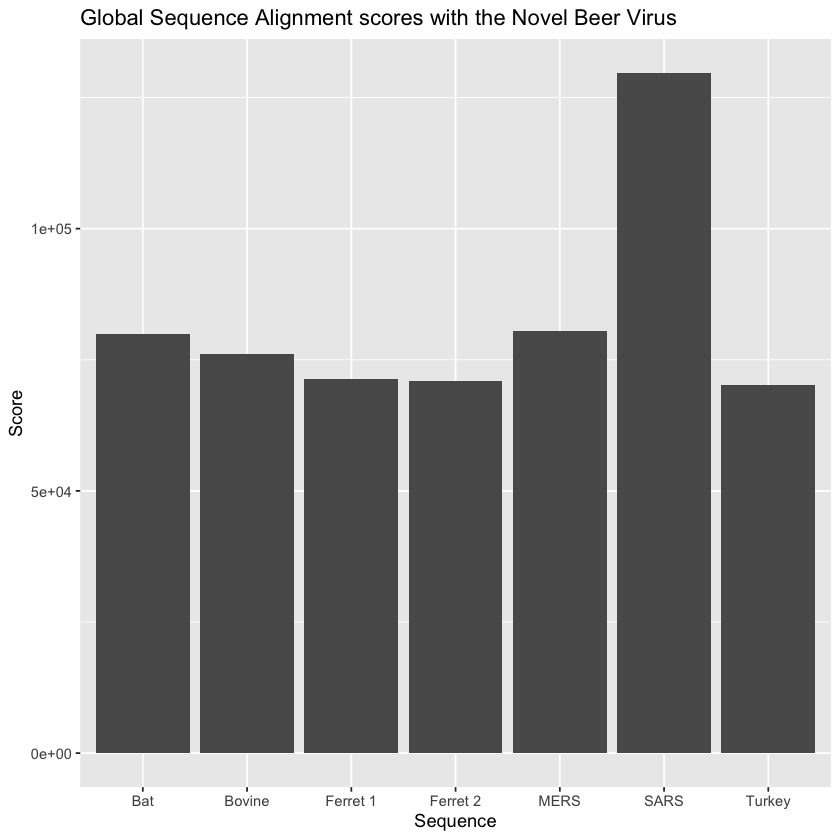

In [109]:
data <- data.frame(
  Sequence=c("SARS","MERS","Bat","Ferret 1","Ferret 2", "Bovine", "Turkey") ,  
  Score=c(129721, 80429.5, 79822, 71247, 70946.5, 76194.5, 70122)
  )

# Barplot
ggplot(data, aes(x=Sequence, y=Score)) + 
  geom_bar(stat = "identity") +ggtitle("Global Sequence Alignment scores with the Novel Beer Virus")
